In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xg
import numpy as np
from sklearn.preprocessing import Imputer,LabelEncoder
from sklearn.decomposition import pca
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline



/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Loading training Data

In [2]:
train_data= pd.read_csv("train.csv")
#train_csv.info()
print "Training Data Shape:",train_data.shape

Training Data Shape: (260753, 299)


# Loading Testing Data

In [3]:
#test_data= pd.read_csv("test.csv")

#print "Test Data Shape:",test_data.shape

Test Data Shape: (173836, 298)


# Quick Look at the data

In [4]:
train_data.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL


In [5]:
test_data.head()

,QuoteNumber,Original_Quote_Date,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,3,2014-08-12,E,16,0.9364,0.0006,"1,487",1.3045,N,4,...,1,1,-1,1,-1,20,-1,25,Y,IL
1,5,2013-09-07,F,11,0.9919,0.0038,564,1.1886,N,8,...,10,10,-1,5,-1,5,-1,21,N,NJ
2,7,2013-03-29,F,15,0.8945,0.0038,564,1.0670,N,11,...,10,11,-1,20,-1,22,-1,11,N,NJ
3,9,2015-03-21,K,21,0.8870,0.0004,"1,113",1.2665,Y,14,...,8,8,-1,13,-1,8,-1,21,N,TX
4,10,2014-12-10,B,25,0.9153,0.0007,935,1.0200,N,4,...,7,7,-1,3,-1,22,-1,21,N,CA


# Dropping Quote Number Column and Saving label column

In [5]:
train_data.drop("QuoteNumber",axis=1, inplace=True)
test_data.drop("QuoteNumber",axis=1, inplace=True)
Y= train_data["QuoteConversion_Flag"].values
train_data.drop("QuoteConversion_Flag",axis=1, inplace=True)

In [5]:
print "Training data Shape", train_data.shape
print "Testing data Shape", test_data.shape
print "Labels Shape", Y.shape

Training data Shape (260753, 297)
Testing data Shape (173836, 297)
Labels Shape (260753,)


# Let's check Class Ratio

In [8]:
print "Number of Positive Quotes", len(Y[Y==1]), len(Y[Y==1])/float(len(Y))
print "Number of Negative Quotes", len(Y[Y==0]), len(Y[Y==0])/float(len(Y))

Number of Positive Quotes 48894 0.18751078607
Number of Negative Quotes 211859 0.81248921393


# Dealing with Date Columns

In [6]:
train_data['Date'] = pd.to_datetime(pd.Series(train_data['Original_Quote_Date']))
train_data = train_data.drop('Original_Quote_Date',axis=1)
test_data['Date'] = pd.to_datetime(pd.Series(test_data['Original_Quote_Date']))
test_data = test_data.drop('Original_Quote_Date',axis=1)
train_data.head()



,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,...,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64,Date
0,B,23,0.9403,0.0006,965,1.0200,N,17,23,17,...,9,-1,8,-1,18,-1,10,N,CA,2013-08-16
1,F,7,1.0006,0.0040,548,1.2433,N,6,8,6,...,10,-1,11,-1,17,-1,20,N,NJ,2014-04-22
2,F,7,1.0006,0.0040,548,1.2433,N,7,12,7,...,18,-1,21,-1,11,-1,8,N,NJ,2014-08-25
3,J,10,0.9769,0.0004,"1,165",1.2665,N,3,2,3,...,5,-1,10,-1,9,-1,21,N,TX,2013-04-15
4,E,23,0.9472,0.0006,"1,487",1.3045,N,8,13,8,...,22,-1,10,-1,11,-1,12,N,IL,2014-01-25


In [10]:
print train_data["PersonalField84"].isnull().sum()

124208


In [11]:
## This is garbarge. For illustration purposes
print "Number of days",len(train_data['Date'].dt.dayofweek.unique())
print test_data['Date'].dt.month.head()
#train['Date'].dt.month.head()


Number of days 7
0     8
1     9
2     3
3     3
4    12
Name: Date, dtype: int64


In [7]:
train_dates = train_data['Date']
test_dates= test_data['Date']
train_data.drop("Date",axis=1, inplace=True)
test_data.drop("Date",axis=1, inplace=True)

# Checking For columns with Null Values (Missing data)

In [8]:
print "Column Name    Number of Nulls   Fraction of entries with null"
count_null=0
null_cols=[]
for f in train_data.columns:
        null_sum=train_data[f].isnull().sum()
        if null_sum>0:
            null_cols.append(f)
            print f,null_sum,null_sum/float(len(train_data))
            count_null+=1


print null_cols
        

Column Name    Number of Nulls   Fraction of entries with null
PersonalField7 113 0.000433360306497
PersonalField84 124208 0.476343512826
PropertyField3 81 0.000310638803772
PropertyField4 63 0.000241607958489
PropertyField29 200685 0.769636399198
PropertyField32 70 0.000268453287211
PropertyField34 70 0.000268453287211
PropertyField36 113 0.000433360306497
PropertyField38 1220 0.00467875729138
['PersonalField7', 'PersonalField84', 'PropertyField3', 'PropertyField4', 'PropertyField29', 'PropertyField32', 'PropertyField34', 'PropertyField36', 'PropertyField38']


# Personal Field 84 and Property Field 29 seem to be the worst. 

We can just drop them. However they might contain info so lets check this out

In [13]:
field_mask="PersonalField84"
print train_data[field_mask].value_counts(dropna=False)
print train_data[field_mask][Y==1].value_counts(dropna=False)
print train_data[field_mask][Y==0].value_counts(dropna=False)


 2.0    134906
NaN     124208
 1.0      1564
 5.0        62
 3.0         7
 7.0         3
 4.0         2
 8.0         1
Name: PersonalField84, dtype: int64
NaN     24082
 2.0    23949
 1.0      827
 5.0       28
 3.0        4
 7.0        2
 4.0        2
Name: PersonalField84, dtype: int64
 2.0    110957
NaN     100126
 1.0       737
 5.0        34
 3.0         3
 7.0         1
 8.0         1
Name: PersonalField84, dtype: int64


In [14]:
field_mask="PropertyField29"
print train_data[field_mask].value_counts(dropna=False)
print train_data[field_mask][Y==1].value_counts(dropna=False)
print train_data[field_mask][Y==0].value_counts(dropna=False)

NaN     200685
 0.0     60056
 1.0        12
Name: PropertyField29, dtype: int64
NaN     48890
 1.0        4
Name: PropertyField29, dtype: int64
NaN     151795
 0.0     60056
 1.0         8
Name: PropertyField29, dtype: int64


In [15]:
field_mask="PropertyField38"
print train_data[field_mask].value_counts(dropna=False)
print train_data[field_mask][Y==1].value_counts(dropna=False)
print train_data[field_mask][Y==0].value_counts(dropna=False)

N      254032
Y        5501
NaN      1220
Name: PropertyField38, dtype: int64
N    47993
Y      901
Name: PropertyField38, dtype: int64
N      206039
Y        4600
NaN      1220
Name: PropertyField38, dtype: int64


In [19]:
train_data.fillna(-1,inplace=True)

# Lets Do some label Encoding for categorical variables

In [20]:
string_cols=[]
for f in train_data.columns:
    if train_data[f].dtype=='object':
        string_cols.append([f,len(train_data[f].unique())])
        lbl = LabelEncoder()
        lbl.fit(list(train_data[f].values) + list(test_data[f].values))
        train_data[f] = lbl.transform(list(train_data[f]))
        test_data[f] = lbl.transform(list(test_data[f]))

In [21]:
print string_cols,len(string_cols)

[] 0


In [ ]:
## If we had used imputer instead
#imputer=Imputer(strategy="most_frequent")
#val_imp=imputer.fit_transform(vals)
#imputer.fit(train)
#train=imputer.transform(train)
#test=imputer.transform(test)
#train=pd.DataFrame(train)
#test=pd.DataFrame(test)   

In [19]:
train_data.dtypes.value_counts()

int64      290
float64      6
dtype: int64

# Train Test (Validation) Split with Stratification

In [15]:
Train_X, Val_X, Train_Y, Val_Y= train_test_split(train_data, Y, test_size=0.33, random_state=42,stratify=Y)

In [21]:
print len(Train_X),len(Val_X)
print len(Train_Y),len(Val_Y)
print np.bincount(Val_Y)/(float(len(Val_Y)))
print np.bincount(Y)/(float(len(Y)))


174704 86049
174704 86049
[ 0.81249056  0.18750944]
[ 0.81248921  0.18751079]


In [ ]:
np.bincount(y)/float(len(y))

In [36]:
clf = xg.XGBClassifier(n_estimators=25,
                        nthread=-1,
                        max_depth=10,
                        learning_rate=0.025,
                        silent=True,
                        subsample=0.8,
                        colsample_bytree=0.8)

In [37]:
xgb_model = clf.fit(Train_X, Train_Y, eval_metric="auc")
## Took around 100 secs for following parameters
##                        n_estimators=30,
##                        nthread=-1,
##                        max_depth=8,
##                        learning_rate=0.1,
##                        silent=False,
##                        subsample=0.8,
##                        colsample_bytree=0.8


In [38]:
Val_pred_proba = clf.predict_proba(Val_X)[:,1]
Train_pred_proba = clf.predict_proba(Train_X)[:,1]

In [39]:
Val_y_pred=clf.predict(Val_X)

In [40]:
train_y_pred=clf.predict(Train_X)


In [45]:
fpr_XG,tpr_XG,thresholds_XG=roc_curve(Val_Y,Val_pred_proba)

In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [41]:
print accuracy_score(Train_Y,train_y_pred)
print classification_report(Train_Y,train_y_pred)

0.924907271728
             precision    recall  f1-score   support

          0       0.92      0.99      0.96    141945
          1       0.94      0.64      0.76     32759

avg / total       0.93      0.92      0.92    174704



In [42]:
print roc_auc_score(Train_Y,Train_pred_proba)

0.962241258907


In [43]:
print accuracy_score(Val_Y,Val_y_pred)
print classification_report(Val_Y,Val_y_pred)


0.921149577566
             precision    recall  f1-score   support

          0       0.92      0.99      0.95     69914
          1       0.92      0.63      0.75     16135

avg / total       0.92      0.92      0.92     86049



In [44]:
print roc_auc_score(Val_Y,Val_pred_proba)

0.958906694425


In [113]:
Importance=pd.Series(data=clf.feature_importances_/max(clf.feature_importances_),index=train_data.columns)

In [114]:
Importance.sort_values(inplace=True,ascending=False)

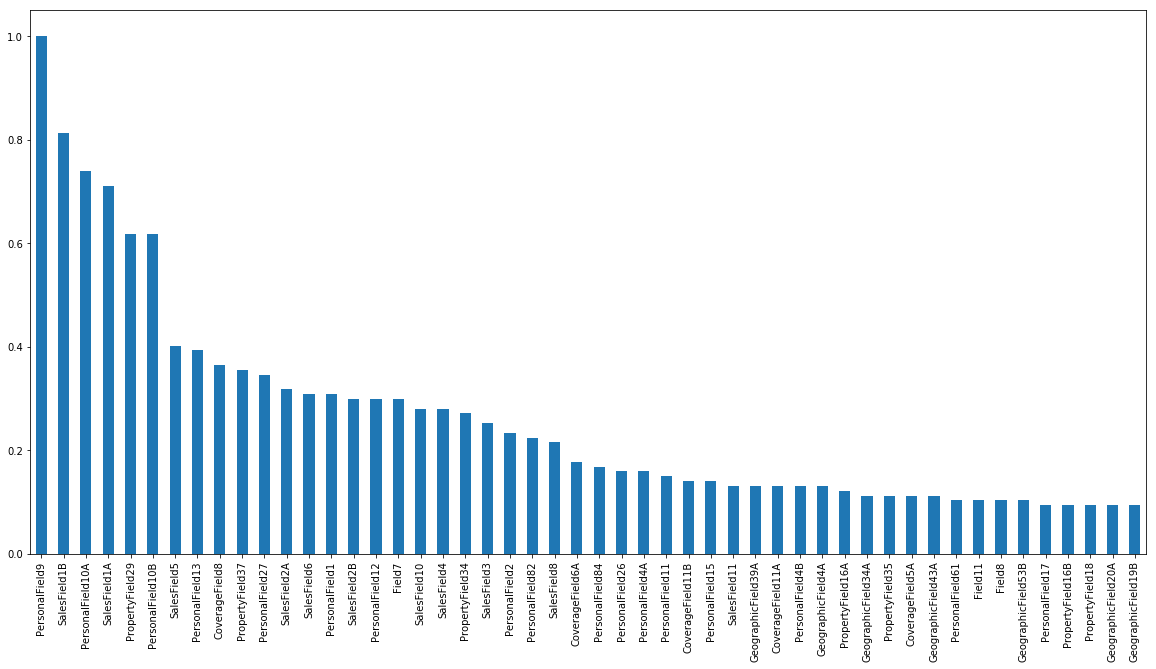

In [115]:
% matplotlib inline
Importance.ix[0:50].plot(kind='bar',figsize=(20,10))

# Trying Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegressionCV

In [70]:
LR= LogisticRegressionCV(n_jobs=-1,scoring='roc_auc')

In [ ]:
LR.fit(Train_X,Train_Y)

In [24]:
LR.coef_[0].shape

(296,)

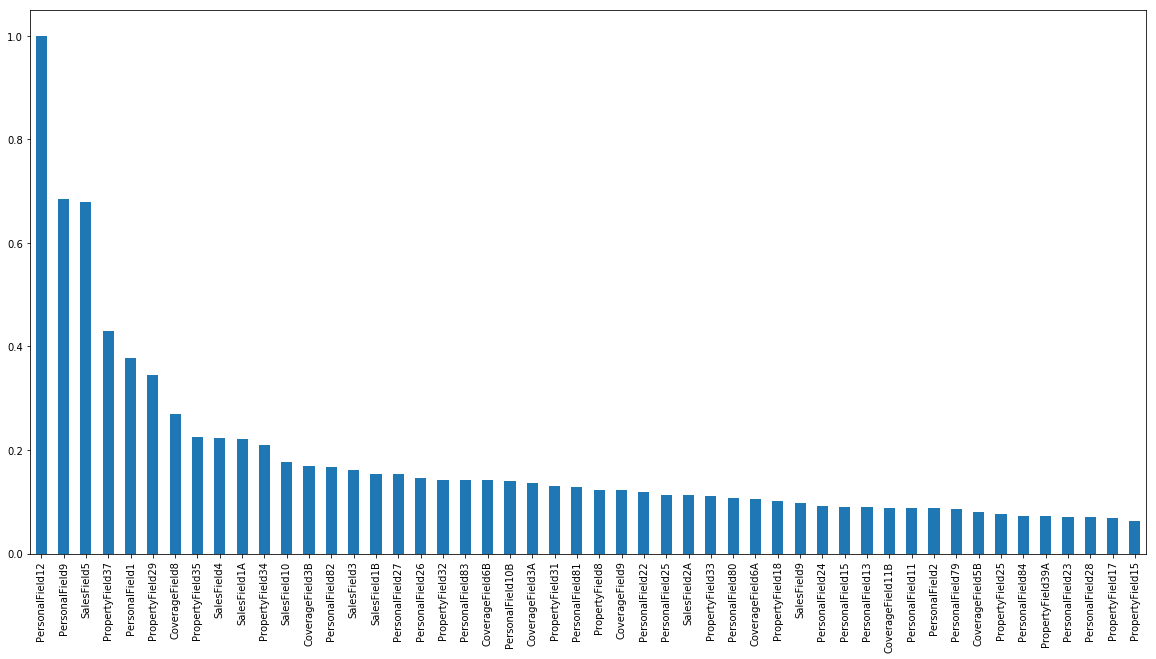

In [26]:
%matplotlib inline
LR_importances= pd.Series(data=np.abs(LR.coef_[0])/max(np.abs(LR.coef_[0])),index=train_data.columns)
LR_importances.sort_values(inplace=True,ascending=False)
LR_importances.ix[0:50].plot(kind='bar',figsize=(20,10))

In [117]:
Imp_joined=pd.concat([Importance,LR_importances],axis=1,keys=["GB","LR"])

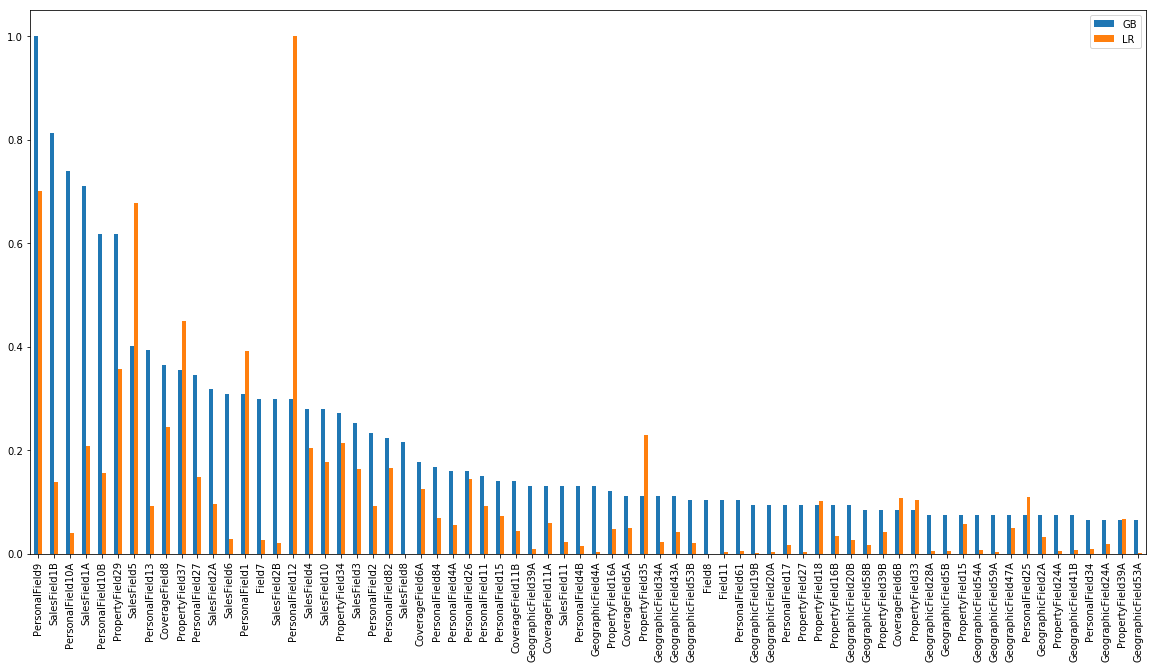

In [126]:
Imp_joined.sort_values(by="GB",inplace=True,ascending=False)
Imp_joined.ix[0:70].plot(kind='bar',figsize=(20,10))

In [29]:
Val_Y_pred_LR=LR.predict(Val_X)
Train_Y_pred_LR=LR.predict(Train_X)
Val_proba_LR=LR.predict_proba(Val_X)[:,1]
Train_proba_LR=LR.predict_proba(Train_X)[:,1]
print accuracy_score(Val_Y,Val_Y_pred_LR)
print classification_report(Val_Y,Val_Y_pred_LR)
print roc_auc_score(Val_Y,Val_proba_LR)

0.842171320992
             precision    recall  f1-score   support

          0       0.87      0.95      0.91     69914
          1       0.64      0.37      0.47     16135

avg / total       0.82      0.84      0.82     86049

0.861176909727


In [ ]:
fpr_LR,tpr_LR,thresholds_LR=roc_curve(Val_Y,Val_pr)

# Let's Visualize things (Move this up)

In [12]:
from sklearn.decomposition import PCA
from sklearn.manifold import isomap,TSNE

In [22]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
pca=PCA(n_components=2,svd_solver='full')



In [24]:
Train_X_Scaled=Scaler.fit(Train_X.values)
Train_X_PCA=pca.fit_transform(Train_X_Scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt


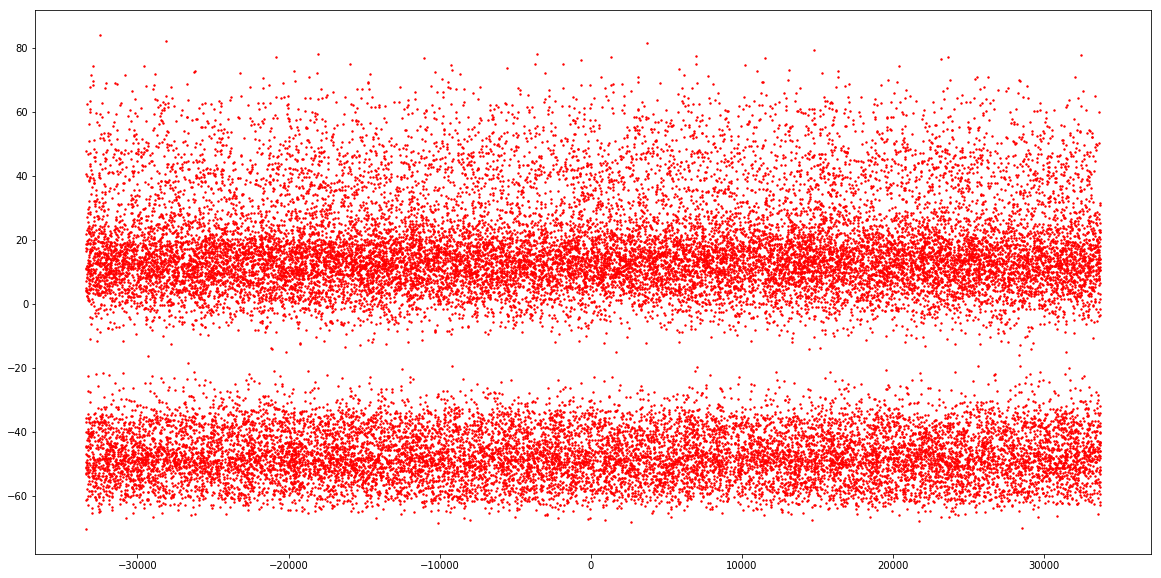

In [51]:
plt.figure(figsize=(20,10))
plt.scatter(Train_X_PCA[Train_Y==1][:,0],Train_X_PCA[Train_Y==1][:,1],s=2.0,c='r')

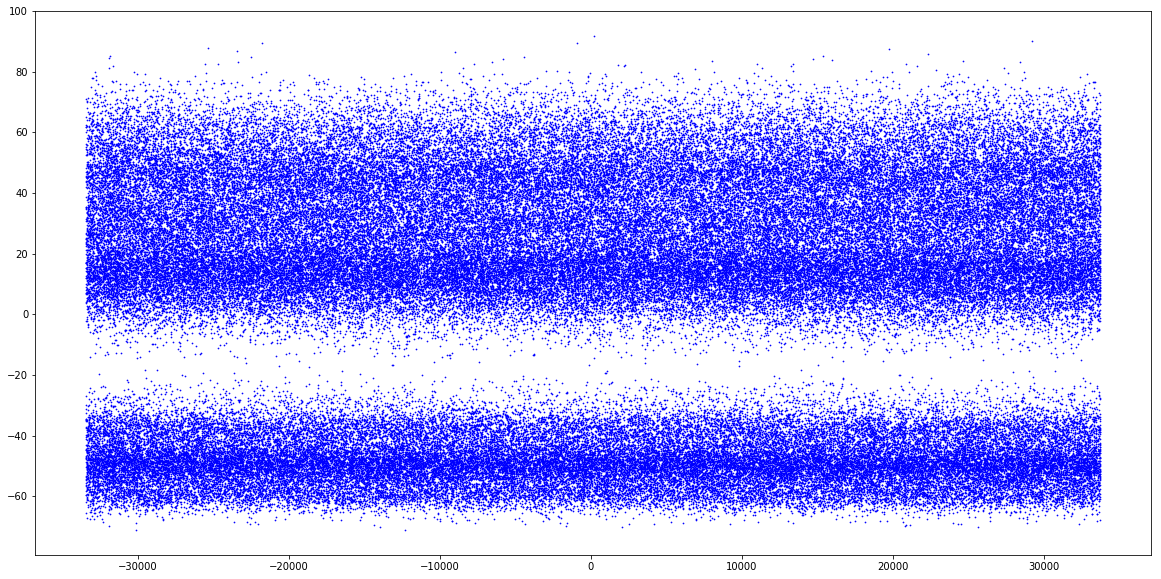

In [52]:
plt.figure(figsize=(20,10))
plt.scatter(Train_X_PCA[Train_Y==0][:,0],Train_X_PCA[Train_Y==0][:,1],s=0.5,c='b')

In [54]:
pca.explained_variance_ratio_

array([  9.99979405e-01,   4.11162300e-06])

In [56]:
pca.components_[0:]

array([[  1.29137415e-07,   1.47842421e-07,  -1.36808913e-08,
         -4.42296562e-10,  -4.85027765e-07,   6.07147159e-09,
          3.38460781e-08,  -2.23319022e-07,  -3.19009875e-07,
         -1.17947175e-07,  -9.51006070e-08,  -4.97919262e-07,
         -6.27507997e-07,  -1.26203613e-07,   1.03832836e-08,
          4.05882244e-07,   5.24976227e-07,   1.86458158e-06,
          2.23593185e-06,  -8.37167690e-09,   1.38758862e-07,
          1.38839387e-07,   2.67099691e-07,   2.70568835e-07,
          6.81763969e-07,   2.87195483e-07,   1.01445110e-06,
         -2.25499873e-08,   6.82604839e-08,   1.81745854e-07,
         -4.41604173e-07,   4.20693176e-07,  -1.00000000e+00,
         -5.59673416e-08,   9.18294303e-08,   1.01487139e-07,
          1.59619011e-07,   2.31835323e-08,  -2.23271383e-09,
          5.34229864e-09,   8.49071295e-08,   1.18456331e-07,
         -1.45598435e-06,  -1.37759294e-06,  -7.51411731e-08,
          6.69865774e-08,   4.80921721e-09,   5.57853549e-10,
        

In [ ]:
model = TSNE(n_components=2, random_state=0)
Train_X_TSNE=model.fit_transform(Val_X)

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(Train_X_TSNE[:,0],Train_X_PCA[:,1],s=2.0,c='r')

# Random Forest cv

In [67]:
Rf=RandomForestClassifier()
Param_grid_Rf={'n_estimators':[80],'min_samples_split':[50],\
                  'max_features':['auto']}
best_Rf=GridSearchCV(Rf,Param_grid_Rf,cv=5,verbose=1,n_jobs=-1,scoring='roc_auc')
best_Rf.fit(Train_X,Train_Y)
print best_Rf.best_params_,best_Rf.best_score_,


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.9min finished


{'max_features': 'auto', 'min_samples_split': 50, 'n_estimators': 80} 0.95652829103


In [68]:
Val_Y_pred_Rf=best_Rf.predict(Val_X)
Train_Y_pred_Rf=best_Rf.predict(Train_X)
Val_proba_Rf=best_Rf.predict_proba(Val_X)[:,1]
Train_proba_Rf=best_Rf.predict_proba(Train_X)[:,1]
print accuracy_score(Val_Y,Val_Y_pred_Rf)
print classification_report(Val_Y,Val_Y_pred_Rf)
print roc_auc_score(Val_Y,Val_proba_Rf)

0.917639949331
             precision    recall  f1-score   support

          0       0.93      0.98      0.95     69914
          1       0.87      0.66      0.75     16135

avg / total       0.92      0.92      0.91     86049

0.957416063663


In [17]:
from sklearn.metrics import roc_curve,auc

In [24]:
x_flat=np.linspace(0,1,500)


array([ 0.        ,  0.00200401,  0.00400802,  0.00601202,  0.00801603,
        0.01002004,  0.01202405,  0.01402806,  0.01603206,  0.01803607,
        0.02004008,  0.02204409,  0.0240481 ,  0.0260521 ,  0.02805611,
        0.03006012,  0.03206413,  0.03406814,  0.03607214,  0.03807615,
        0.04008016,  0.04208417,  0.04408818,  0.04609218,  0.04809619,
        0.0501002 ,  0.05210421,  0.05410822,  0.05611222,  0.05811623,
        0.06012024,  0.06212425,  0.06412826,  0.06613226,  0.06813627,
        0.07014028,  0.07214429,  0.0741483 ,  0.0761523 ,  0.07815631,
        0.08016032,  0.08216433,  0.08416834,  0.08617234,  0.08817635,
        0.09018036,  0.09218437,  0.09418838,  0.09619238,  0.09819639,
        0.1002004 ,  0.10220441,  0.10420842,  0.10621242,  0.10821643,
        0.11022044,  0.11222445,  0.11422846,  0.11623246,  0.11823647,
        0.12024048,  0.12224449,  0.1242485 ,  0.12625251,  0.12825651,
        0.13026052,  0.13226453,  0.13426854,  0.13627255,  0.13

AUC for Random Forest=0.956581881078


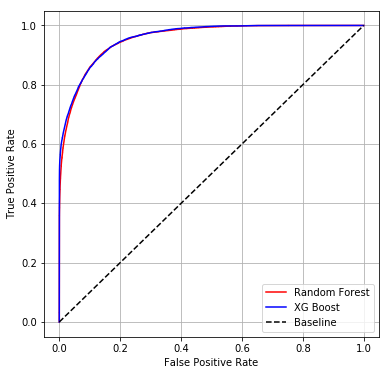

In [46]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure()

fpr_Rf,tpr_Rf,thresholds_Rf=roc_curve(Val_Y,Val_proba_Rf)

print "AUC for Random Forest={}".format(auc(fpr_Rf,tpr_Rf))

plt.figure(figsize=(6,6))
plt.plot(fpr_Rf, tpr_Rf,'r-',label="Random Forest")
plt.plot(fpr_XG, tpr_XG,'b-',label="XG Boost")
plt.plot(x_flat,x_flat,'k--',label="Baseline")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.grid()


## Scratch

In [50]:
pca=PCA(n_components=100,svd_solver='full')
Train_X_PCA=pca.fit_transform(Train_X)
Val_X_PCA=pca.transform(Val_X)

### Change Variable Names

In [51]:
Rf=RandomForestClassifier()
Param_grid_Rf={'n_estimators':[50],'min_samples_split':[100],\
                  'max_features':['auto']}
best_Rf=GridSearchCV(Rf,Param_grid_Rf,cv=5,verbose=1,n_jobs=-1,scoring='roc_auc')
best_Rf.fit(Train_X_PCA,Train_Y)
print best_Rf.best_params_,best_Rf.best_score_,

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.9min finished


{'max_features': 'auto', 'min_samples_split': 100, 'n_estimators': 50} 0.784038945221


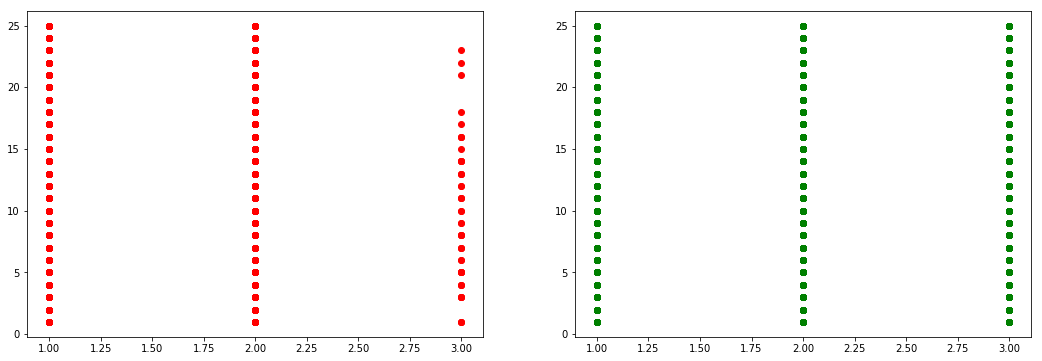

In [66]:
fig=plt.figure(figsize=(18,6))
ax=plt.subplot(1,2,1)
plt.scatter(Train_X[Train_Y==1]["PersonalField9"],Train_X[Train_Y==1]["SalesField1B"],c='r')
#ax.hexbin(Train_X[Train_Y==1]["PersonalField9"],Train_X[Train_Y==1]["SalesField1B"], gridsize=10, cmap='viridis')
ax=plt.subplot(1,2,2)
plt.scatter(Train_X[Train_Y==0]["PersonalField9"],Train_X[Train_Y==0]["SalesField1B"],c='g')
#ax.hexbin(Train_X[Train_Y==0]["PersonalField9"],Train_X[Train_Y==0]["SalesField1B"], gridsize=10, cmap='viridis')
#plt.colormap()


# Things to do
explore scaling of variables